In [ ]:
''''In tis main file we do an initial explortation, we clean the data, and perfoirm EDA and vizualisation'''

import pandas as pd
import warnings

warnings.filterwarnings("ignore")

import initial_exploration as explo
import data_cleaning as cl
import eda as eda

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)

# Data Quality Analysis (Data Cleaning)

### Cash Requests Analysis

In [2]:
# Load datasets:
cash_requests = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

In [3]:
# First look to cash_request data
cash_requests.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
# Inital exploration cash_request data
explo.check(cash_requests)

Number of columns: 16 amd rows: 23970

Data types:
id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
dtype: object

Unique values count:
id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10798
moderated_at                  16035
deleted_account_id             1141
reimbursement_dat

In [5]:
# Cleaning the data for cash request data frame

# Formating dates column 
cl.convert_dates(cash_requests, cl.cash_request_date_columns)

# New look to the data after date columns fixed
cash_requests.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10,2019-12-11,804.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
1,70,100.0,rejected,2019-12-10,2019-12-11,231.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
2,7,100.0,rejected,2019-12-10,2019-12-11,191.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
3,10,99.0,rejected,2019-12-10,2019-12-18,761.0,2019-12-18,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT
4,1594,100.0,rejected,2020-05-06,2020-05-07,7686.0,2020-05-07,NaN,2020-06-05,NaT,NaT,regular,NaT,NaN,NaT,NaT


In [6]:
# Let's ensure all the data is in the correct format
explo.check(cash_requests)

Number of columns: 16 amd rows: 23970

Data types:
id                                     int64
amount                               float64
status                                object
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
user_id                              float64
moderated_at                  datetime64[ns]
deleted_account_id                   float64
reimbursement_date            datetime64[ns]
cash_request_received_date    datetime64[ns]
money_back_date               datetime64[ns]
transfer_type                         object
send_at                       datetime64[ns]
recovery_status                       object
reco_creation                 datetime64[ns]
reco_last_update              datetime64[ns]
dtype: object

Unique values count:
id                            23970
amount                           41
status                            7
created_at                      330
updated_at                      401
user_id      

### Fees Analysis

In [7]:
# First look to fees data
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [8]:
# Inital exploration fees data
explo.check(fees)

Number of columns: 13 amd rows: 21061

Data types:
id                   int64
cash_request_id    float64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

Unique values count:
id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at         21026
updated_at         21061
paid_at            15529
from_date           1084
to_date             1560
charge_moment          2
dtype: int64

This columns apear to be categroical:
 Index(['type', 'status', 'category', 'total_amount', 'charge_moment'], dtype='object')

Unique value count for categorical columns:
type
instant_payment    11099
postpone            77

In [9]:
# Cleaning the data for fees data frame

# Formating dates column 
cl.convert_dates(fees, cl.fees_data_date_columns)

# New look to the data after date columns fixed
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07,2020-10-13,2020-12-17,NaT,NaT,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09,2020-10-13,2020-12-08,NaT,NaT,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23,2020-10-23,2020-11-04,NaT,NaT,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31,2020-10-31,2020-11-19,NaT,NaT,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06,2020-10-13,2020-11-02,NaT,NaT,after


In [10]:
# Let's ensure all the data is in the correct format
explo.check(fees)

Number of columns: 13 amd rows: 21061

Data types:
id                          int64
cash_request_id           float64
type                       object
status                     object
category                   object
total_amount              float64
reason                     object
created_at         datetime64[ns]
updated_at         datetime64[ns]
paid_at            datetime64[ns]
from_date          datetime64[ns]
to_date            datetime64[ns]
charge_moment              object
dtype: object

Unique values count:
id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at           157
updated_at            34
paid_at              229
from_date            187
to_date              197
charge_moment          2
dtype: int64

This columns apear to be categroical:
 Index(['type', 'status', 'category', 'total_amount', 'charge_moment'], dtype='object')

Uniqu

### Data Cleaning 

In [11]:
# Let's merge the two data frames. Data from cash request using the 'id' columns
# and fees data frame usiung the 'cash_request_id' column and keep cleaning

# Renaming column 'id' to 'cash_request_id' in cash request data frame for better understending
cash_requests = cl.rename_col(cash_requests, 'id', 'cash_request_id')

# Merging the data frames and saving them into a new data frame: data_df
data_df = cl.merge_df(cash_requests, fees, 'outer', 'cash_request_id')

# Renaming columns of equal name in both data frames. The columns from cash request to start with CR_
# and the once from fees to fee_
data_df = cl.rename_col_xy(data_df)

# Column with the fee id values is rename to id_fee for better understanding
data_df = cl.rename_col(data_df, 'id', 'id_fee')

# Reason column include the category + date or request id, resulting in many unique values
# with this modification we remove the date or request id and this way we ended with 4 unique 
# values that can be used for EDA
data_df = cl.clean_text_column(data_df, "reason")

# Removing the rows without a cash request amount
data_df = cl.remove_nan(data_df, "amount")

# Id fee column is not necesary for the analysis and category column have many missing values so we will drop
data_df = cl.drop_col(data_df, ["id_fee", "category"])

# Let's check this changes
data_df.head(20)

4 rows were removed



,cash_request_id,amount,CR_status,CR_created_at,CR_updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,type,fee_status,total_amount,reason,fee_created_at,fee_updated_at,paid_at,from_date,to_date,charge_moment
0,3.0,1.0,canceled,2019-11-19,2020-12-14,47.0,2019-11-20,NaN,2019-12-05,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
1,4.0,100.0,money_back,2019-12-09,2020-11-04,NaN,2019-12-09,1309.0,2019-12-16,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
2,5.0,100.0,rejected,2019-12-10,2019-12-11,804.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
3,6.0,100.0,direct_debit_rejected,2019-12-10,2020-12-18,812.0,2019-12-11,NaN,2020-02-05,2019-12-11,NaT,regular,NaT,pending,2020-03-20,2020-12-18,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
4,7.0,100.0,rejected,2019-12-10,2019-12-11,191.0,2019-12-11,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
5,9.0,100.0,money_back,2019-12-10,2020-11-04,430.0,2019-12-11,NaN,2020-01-08,2019-12-11,2020-05-12,regular,NaT,completed,2020-03-20,2020-05-12,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
6,10.0,99.0,rejected,2019-12-10,2019-12-18,761.0,2019-12-18,NaN,2020-01-09,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
7,11.0,100.0,money_back,2019-12-10,2020-11-04,735.0,2019-12-11,NaN,2019-12-30,2019-12-12,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
8,13.0,100.0,direct_debit_rejected,2019-12-10,2020-11-04,406.0,2019-12-11,NaN,2020-02-05,2019-12-12,NaT,regular,NaT,pending,2020-03-20,2020-03-31,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
9,28.0,100.0,money_back,2019-12-10,2020-11-04,140.0,2019-12-11,NaN,2020-01-08,NaT,NaT,regular,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN


In [12]:
# Exploration of the merged data frame
explo.check(data_df)

Number of columns: 26 amd rows: 32094

Data types:
cash_request_id                      float64
amount                               float64
CR_status                             object
CR_created_at                 datetime64[ns]
CR_updated_at                 datetime64[ns]
user_id                              float64
moderated_at                  datetime64[ns]
deleted_account_id                   float64
reimbursement_date            datetime64[ns]
cash_request_received_date    datetime64[ns]
money_back_date               datetime64[ns]
transfer_type                         object
send_at                       datetime64[ns]
recovery_status                       object
reco_creation                 datetime64[ns]
reco_last_update              datetime64[ns]
type                                  object
fee_status                            object
total_amount                         float64
reason                                object
fee_created_at                datetime64[ns]
fee_

In [13]:
# Creating individual data frames for columns that are numerical, categorical, and dates
frames = cl.selecting_data_types(data_df)
num = frames[1]
cat = frames[0]
date = frames[2]

In [14]:
# First look to categorical columns
cat.head()

,CR_status,transfer_type,recovery_status,type,fee_status,reason,charge_moment,total_amount
0,canceled,regular,NaN,NaN,NaN,NaN,NaN,NaN
1,money_back,regular,NaN,NaN,NaN,NaN,NaN,NaN
2,rejected,regular,NaN,NaN,NaN,NaN,NaN,NaN
3,direct_debit_rejected,regular,pending,NaN,NaN,NaN,NaN,NaN
4,rejected,regular,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Total amount should be numerical so we are moving it from cat to num
cat, num = cl.move_column(cat, num, "total_amount")

#Let's check cat again
cat.head()

,CR_status,transfer_type,recovery_status,type,fee_status,reason,charge_moment
0,canceled,regular,NaN,NaN,NaN,NaN,NaN
1,money_back,regular,NaN,NaN,NaN,NaN,NaN
2,rejected,regular,NaN,NaN,NaN,NaN,NaN
3,direct_debit_rejected,regular,pending,NaN,NaN,NaN,NaN
4,rejected,regular,NaN,NaN,NaN,NaN,NaN


In [16]:
# Setting CR created at as index for the cohort analysis 
cat = cl.set_index(cat, data_df, 'CR_created_at')

#Let's check cat again
cat.head()

,CR_status,transfer_type,recovery_status,type,fee_status,reason,charge_moment
CR_created_at,,,,,,,
2019-11-19,canceled,regular,NaN,NaN,NaN,NaN,NaN
2019-12-09,money_back,regular,NaN,NaN,NaN,NaN,NaN
2019-12-10,rejected,regular,NaN,NaN,NaN,NaN,NaN
2019-12-10,direct_debit_rejected,regular,pending,NaN,NaN,NaN,NaN
2019-12-10,rejected,regular,NaN,NaN,NaN,NaN,NaN


In [17]:
# First look to date data frame
date.head()

,CR_created_at,CR_updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,send_at,reco_creation,reco_last_update,fee_created_at,fee_updated_at,paid_at,from_date,to_date
0,2019-11-19,2020-12-14,2019-11-20,2019-12-05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2019-12-09,2020-11-04,2019-12-09,2019-12-16,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-12-10,2019-12-11,2019-12-11,2020-01-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2019-12-10,2020-12-18,2019-12-11,2020-02-05,2019-12-11,NaT,NaT,2020-03-20,2020-12-18,NaT,NaT,NaT,NaT,NaT
4,2019-12-10,2019-12-11,2019-12-11,2020-01-09,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [18]:
# First look to categorical columns. User_id was kept for the cohort analysis
num.head()

,amount,user_id,total_amount
0,1.0,47.0,NaN
1,100.0,NaN,NaN
2,100.0,804.0,NaN
3,100.0,812.0,NaN
4,100.0,191.0,NaN


In [19]:
# Lets add more data to the numerical data frame using the dates column

# Time between a CR is created and Ironhack get the mnoney back
df_time_between_CR_and_money_back = cl.process_date_columns(date, "CR_created_at", "money_back_date", "days_difference_CR_back")
num = cl.merge_by_index(num, df_time_between_CR_and_money_back, "outer", "days_difference_CR_back")

# Time between a fee timestamp is created and Ironhack get the mnoney
df_time_between_fee_created_and_paid_at_date = cl.process_date_columns(date, "fee_created_at", "paid_at", "days_difference_fee_paid")
num = cl.merge_by_index(num, df_time_between_fee_created_and_paid_at_date, "outer", "days_difference_fee_paid")


# A new look to numerical data frame
num.head(10)

,amount,user_id,total_amount,days_difference_CR_back,days_difference_fee_paid
0,1.0,47.0,NaN,NaN,NaN
1,100.0,NaN,NaN,NaN,NaN
2,100.0,804.0,NaN,NaN,NaN
3,100.0,812.0,NaN,NaN,NaN
4,100.0,191.0,NaN,NaN,NaN
5,100.0,430.0,NaN,154.0,NaN
6,99.0,761.0,NaN,NaN,NaN
7,100.0,735.0,NaN,NaN,NaN
8,100.0,406.0,NaN,NaN,NaN
9,100.0,140.0,NaN,NaN,NaN


In [20]:
# Setting CR created at as index for the cohort analysis 
num = cl.set_index(num, data_df, 'CR_created_at')

# A new look to numerical data frame
num.head(10)

,amount,user_id,total_amount,days_difference_CR_back,days_difference_fee_paid
CR_created_at,,,,,
2019-11-19,1.0,47.0,NaN,NaN,NaN
2019-12-09,100.0,NaN,NaN,NaN,NaN
2019-12-10,100.0,804.0,NaN,NaN,NaN
2019-12-10,100.0,812.0,NaN,NaN,NaN
2019-12-10,100.0,191.0,NaN,NaN,NaN
2019-12-10,100.0,430.0,NaN,154.0,NaN
2019-12-10,99.0,761.0,NaN,NaN,NaN
2019-12-10,100.0,735.0,NaN,NaN,NaN
2019-12-10,100.0,406.0,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

### Categorical columns EDA

CR_status
                       absolute_frequency  relative_frequency
money_back                          23270               0.725
rejected                             6568               0.205
direct_debit_rejected                1941               0.060
active                                158               0.005
direct_debit_sent                      74               0.002
transaction_declined                   48               0.001
canceled                               35               0.001
Total                               32094               0.999


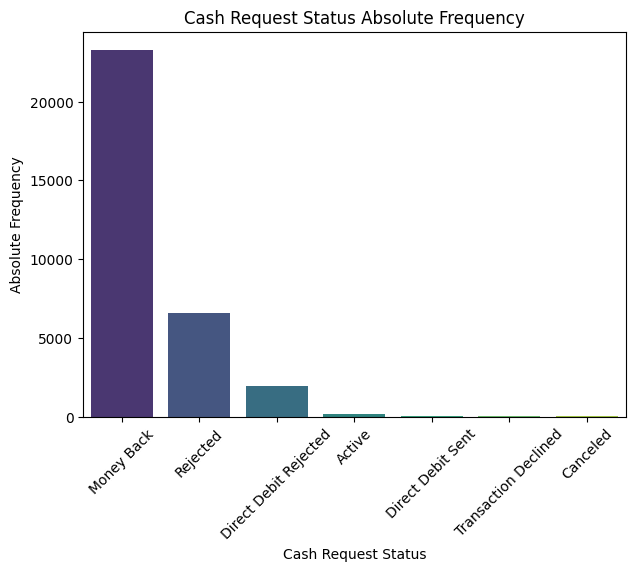

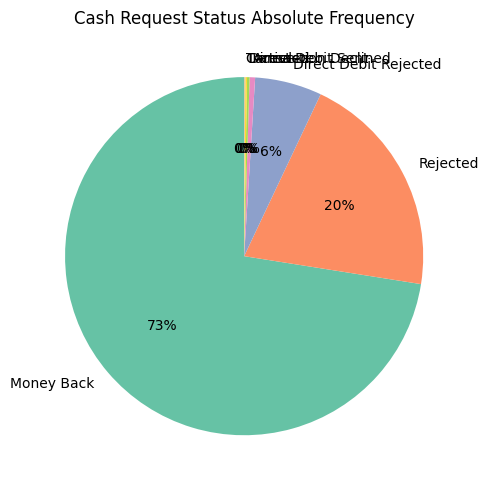


transfer_type
         absolute_frequency  relative_frequency
instant               19488               0.607
regular               12606               0.393
Total                 32094               1.000


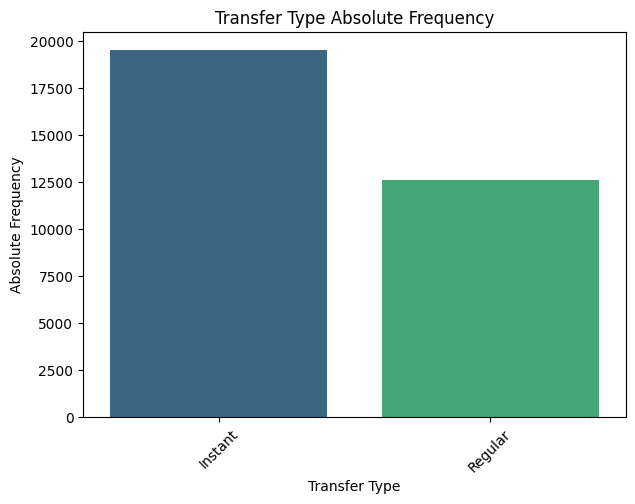

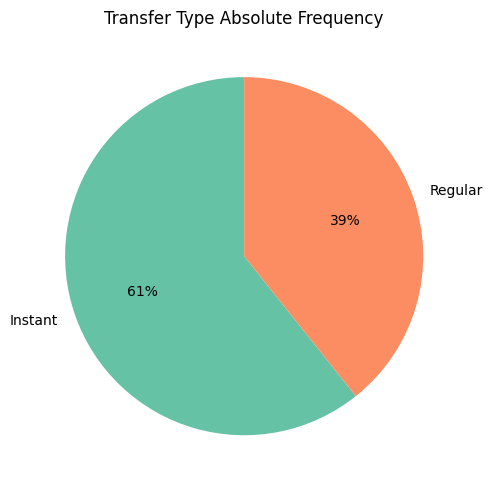


recovery_status
                      absolute_frequency  relative_frequency
completed                           5167               0.718
pending                             1996               0.277
pending_direct_debit                  36               0.005
cancelled                              1               0.000
Total                               7200               1.000


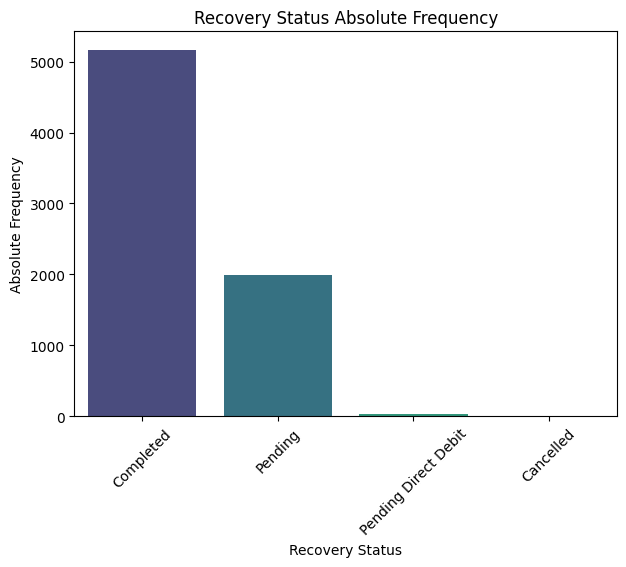

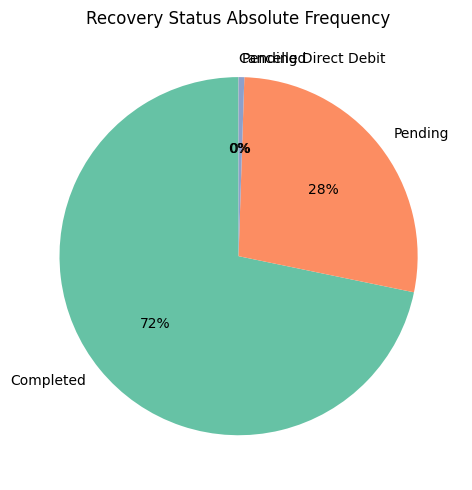


type
                 absolute_frequency  relative_frequency
instant_payment               11095               0.527
postpone                       7766               0.369
incident                       2196               0.104
Total                         21057               1.000


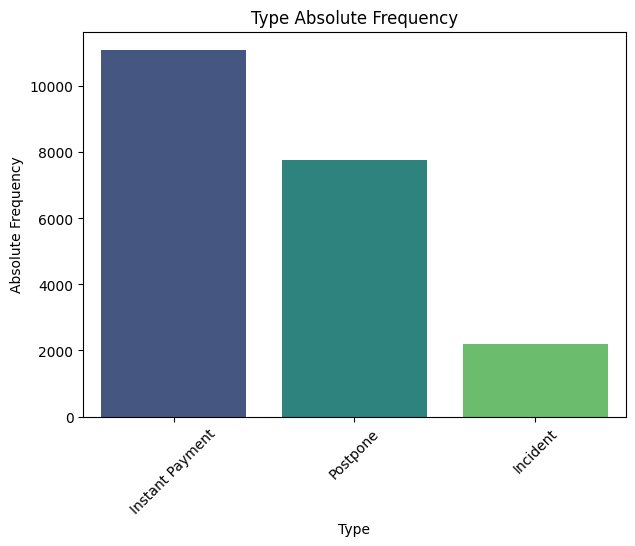

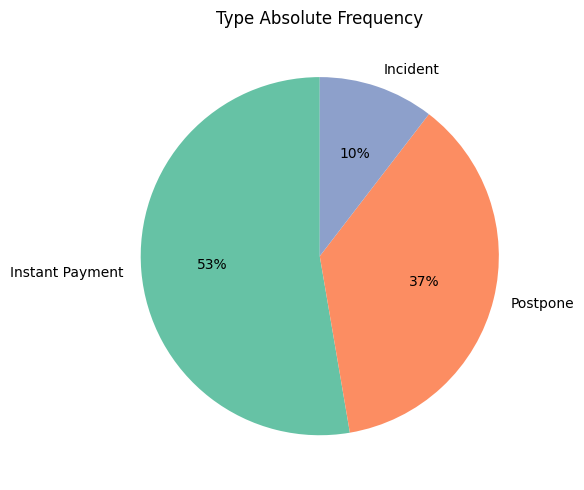


fee_status
           absolute_frequency  relative_frequency
accepted                14841               0.705
cancelled                4934               0.234
rejected                 1194               0.057
confirmed                  88               0.004
Total                   21057               1.000


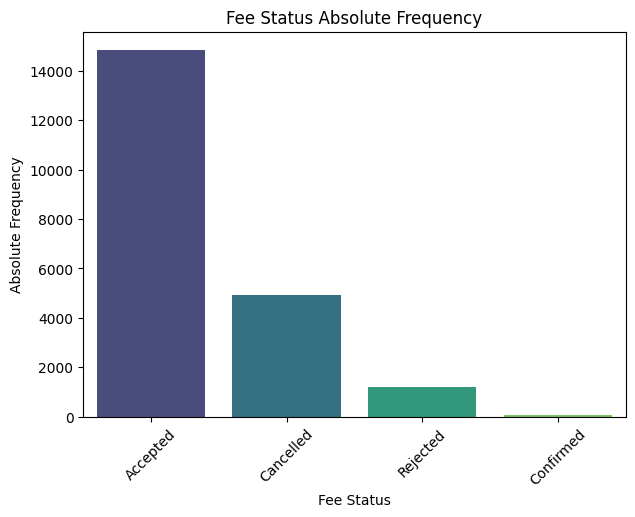

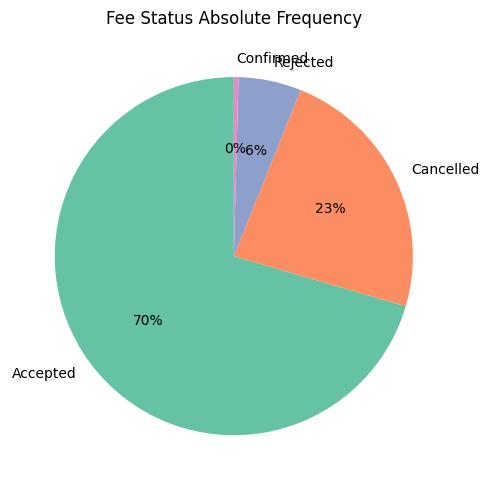


reason
                              absolute_frequency  relative_frequency
Instant Payment Cash Request               11095               0.527
Postpone Cash Request                       7766               0.369
rejected direct debit                       1599               0.076
month delay on payment                       597               0.028
Total                                      21057               1.000


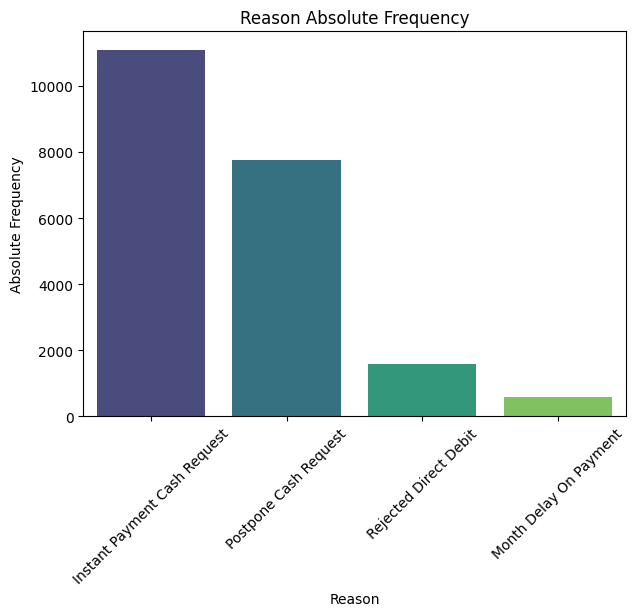

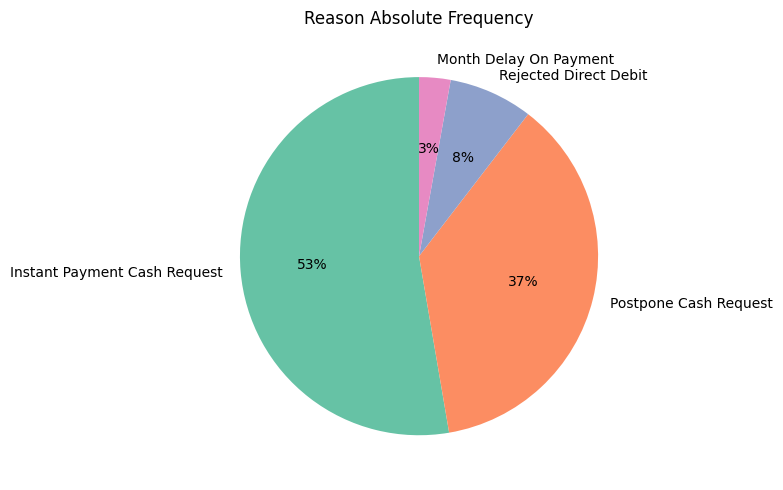


charge_moment
        absolute_frequency  relative_frequency
after                16720               0.794
before                4337               0.206
Total                21057               1.000


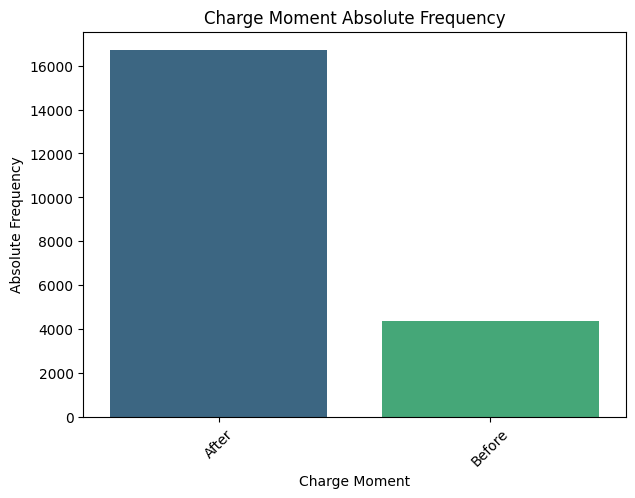

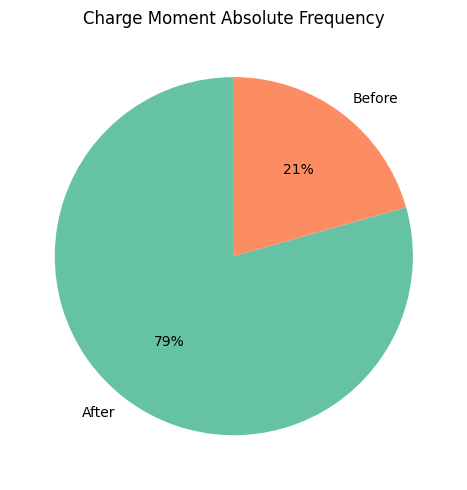

In [21]:
# Generate frequency table and bar plots for category columns
for column in cat.columns:
    print(column)
    df0, df1 = eda.freq(cat, column)
    print(df0)
    eda.cat_viz(cat, df1, column)
    print("")

### Numerical columns EDA

amount
count    32094.000000
mean        83.516514
std         25.900244
min          1.000000
25%         50.000000
50%        100.000000
75%        100.000000
max        200.000000
Name: amount, dtype: float64


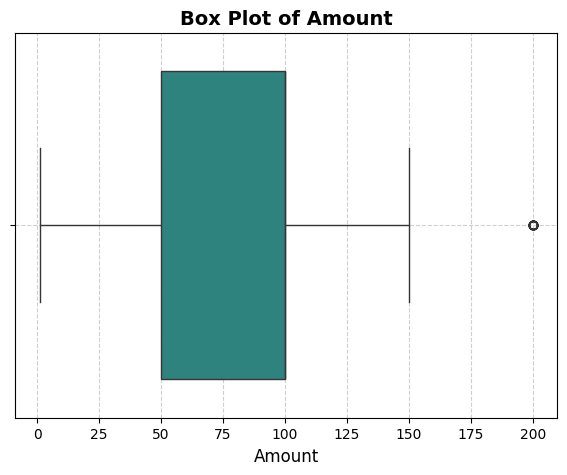

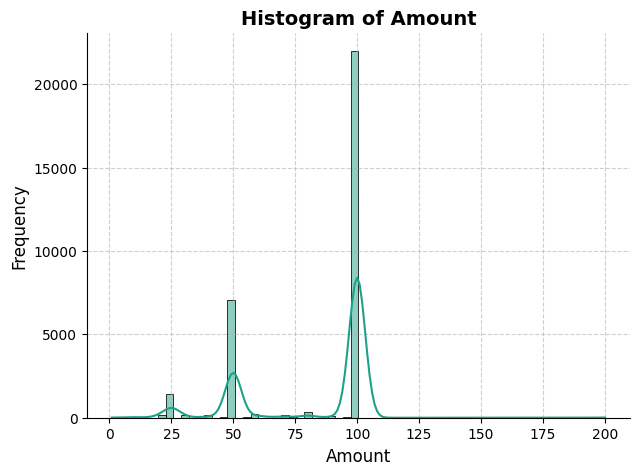


user_id
count     29522.000000
mean      31936.772576
std       26401.062842
min          34.000000
25%       11499.000000
50%       23823.000000
75%       45419.000000
max      103719.000000
Name: user_id, dtype: float64


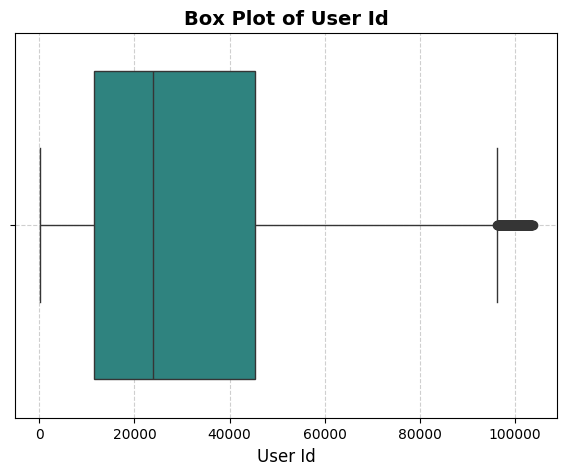

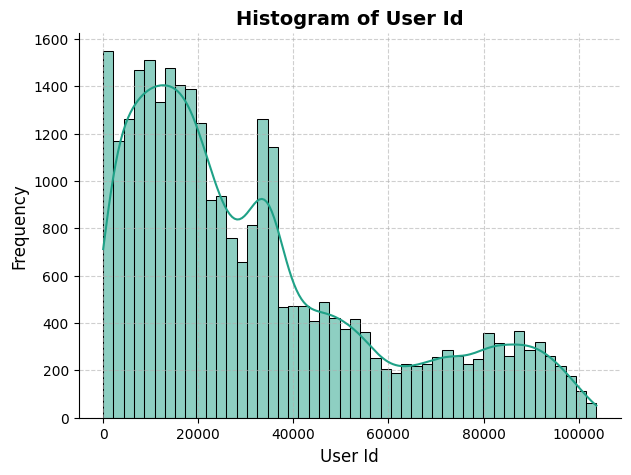


total_amount
count    21057.000000
mean         5.000237
std          0.034457
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: total_amount, dtype: float64


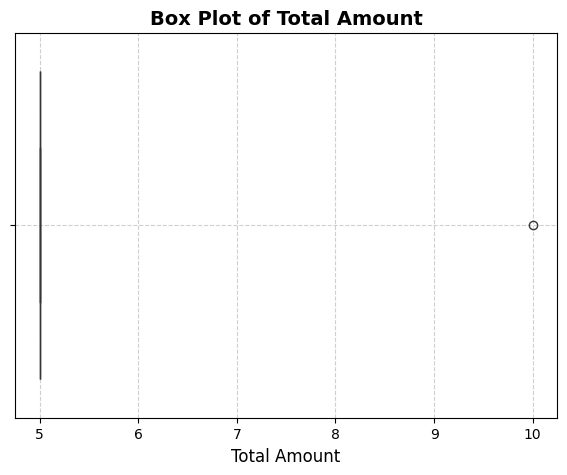

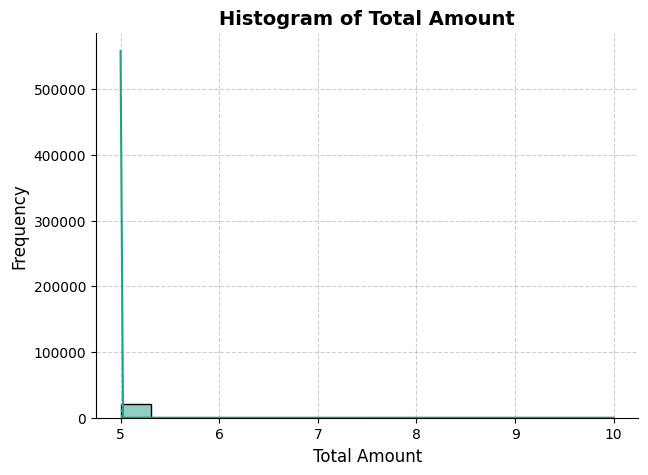


days_difference_CR_back
count    23917.000000
mean        40.175273
std         31.408267
min          0.000000
25%         20.000000
50%         29.000000
75%         52.000000
max        375.000000
Name: days_difference_CR_back, dtype: float64


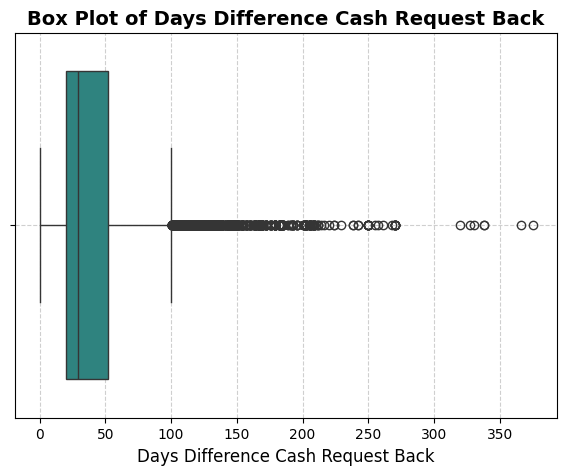

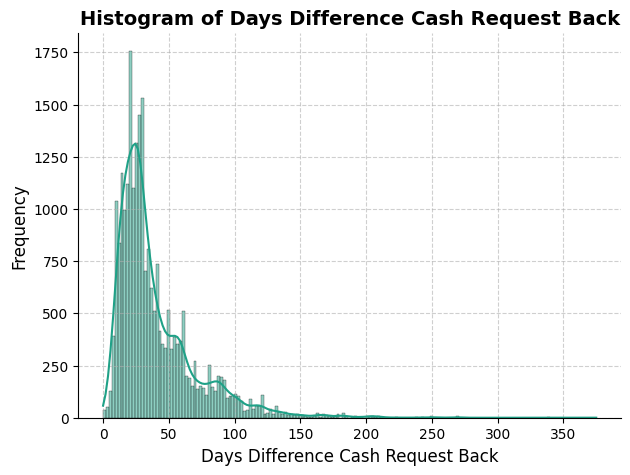


days_difference_fee_paid
count    15438.000000
mean        26.140692
std         25.963883
min          0.000000
25%          9.000000
50%         21.000000
75%         34.000000
max        183.000000
Name: days_difference_fee_paid, dtype: float64


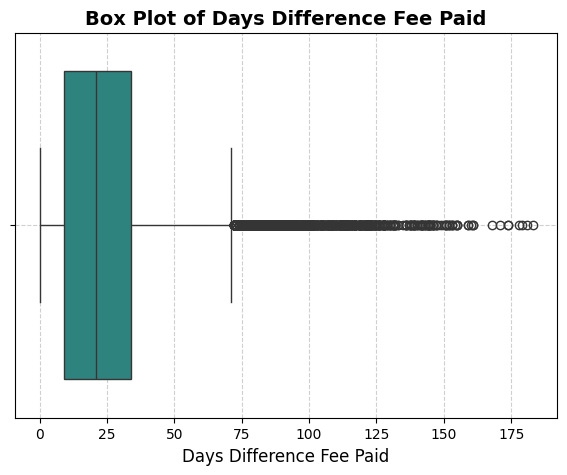

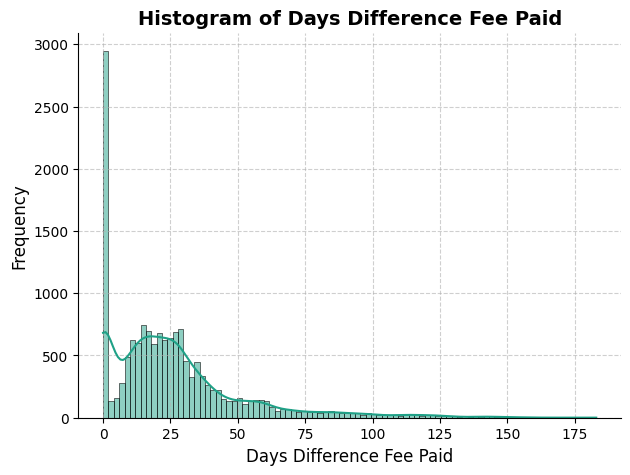

In [22]:
# EDA for numerical columns
for column in num.columns:
    print(column)
    print(eda.stat(num, column))
    eda.stat_viz(num,column)
    print("")

# Cohort Analysis

## Univariate

### Frequency

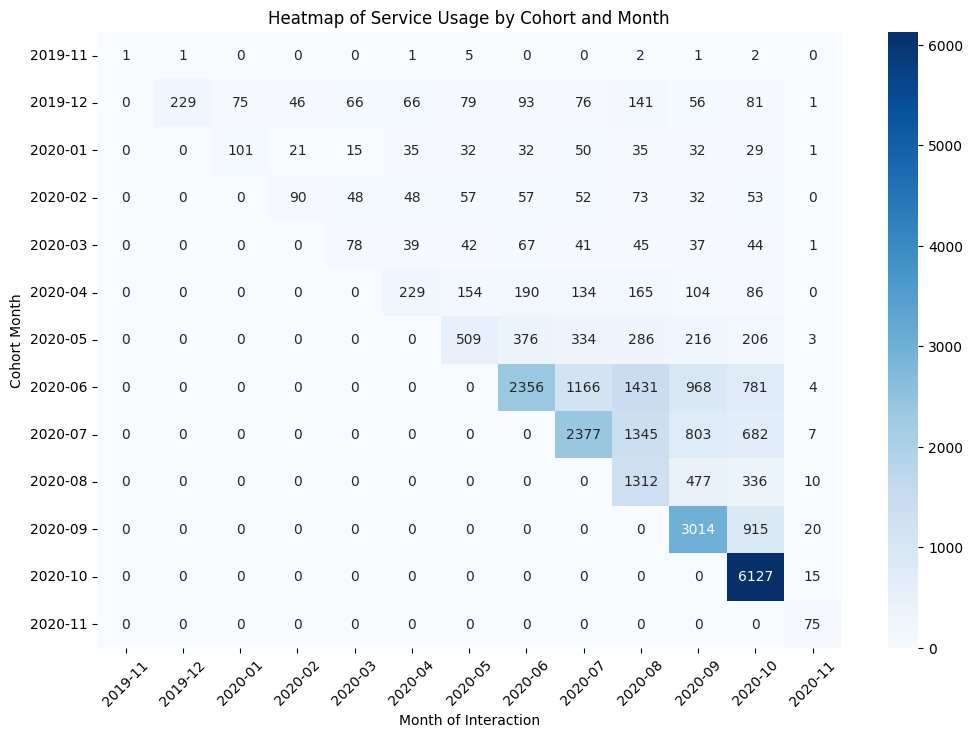

cohort_month
2019-11       1
2019-12     204
2020-01      90
2020-02      84
2020-03      69
2020-04     212
2020-05     369
2020-06    1338
2020-07    1294
2020-08     656
2020-09    1712
2020-10    4694
2020-11      75
Freq: M, Name: user_id, dtype: int64

In [23]:
# Copy of data_df
data_fre = data_df.copy()

# Frequency hit mpa by cohort
cohort_size, cohort_table = eda.fre(data_fre)
cohort_size

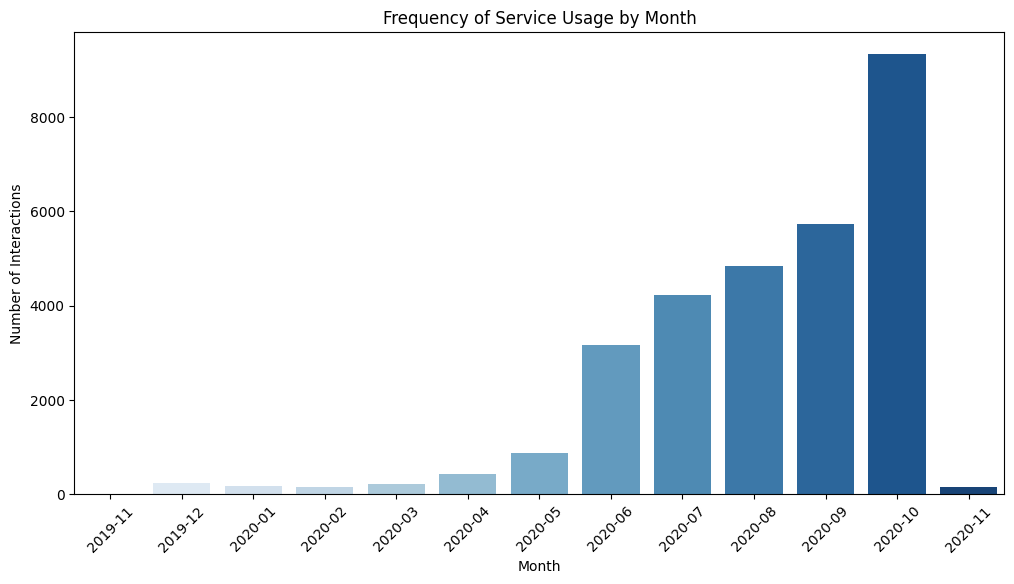

,Month,Total Interactions
0,2019-11,1.0
1,2019-12,230.0
2,2020-01,176.0
3,2020-02,157.0
4,2020-03,207.0
5,2020-04,418.0
6,2020-05,878.0
7,2020-06,3171.0
8,2020-07,4230.0
9,2020-08,4835.0


In [24]:
# Frequency of service usage per month
frequency_table = eda.fre_bar(cohort_table)
frequency_table

### Incident Rate

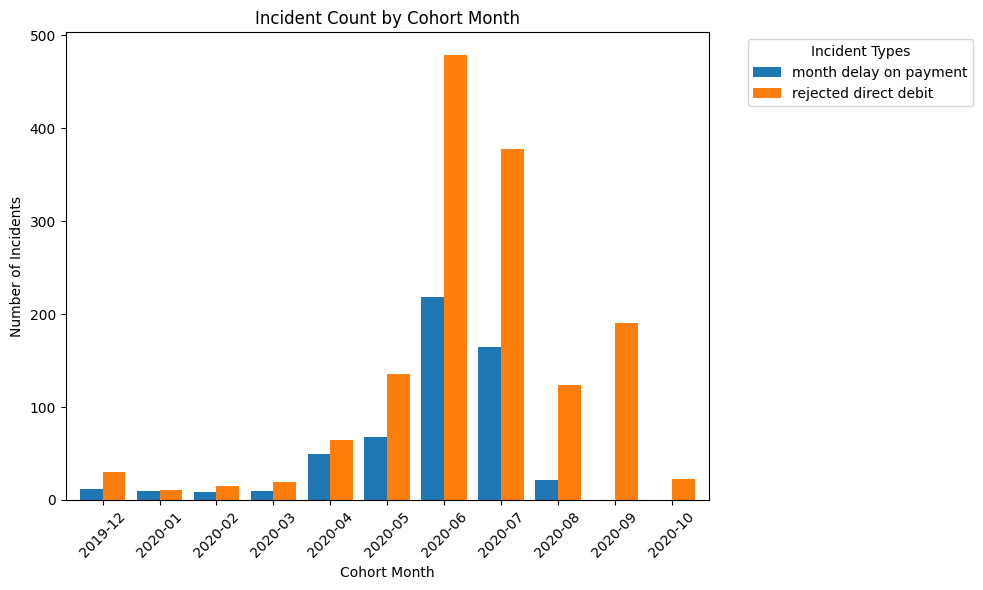

cohort_month
2019-11          NaN
2019-12    12.745098
2020-01    10.000000
2020-02    15.476190
2020-03    23.188406
2020-04    23.113208
2020-05    28.997290
2020-06    29.970105
2020-07    25.888717
2020-08    18.750000
2020-09    11.098131
2020-10     0.489987
2020-11          NaN
Freq: M, Name: user_id, dtype: float64

In [25]:
#Copy of categorical data frame
cat_r = data_df.copy()

# Incident Rate: The incident rate, specifically focusing on payment incidents, for each cohort
incident_rate, frequency_table = eda.incident_metric(cat_r)

# Let's have a look to the incident rate table
incident_rate

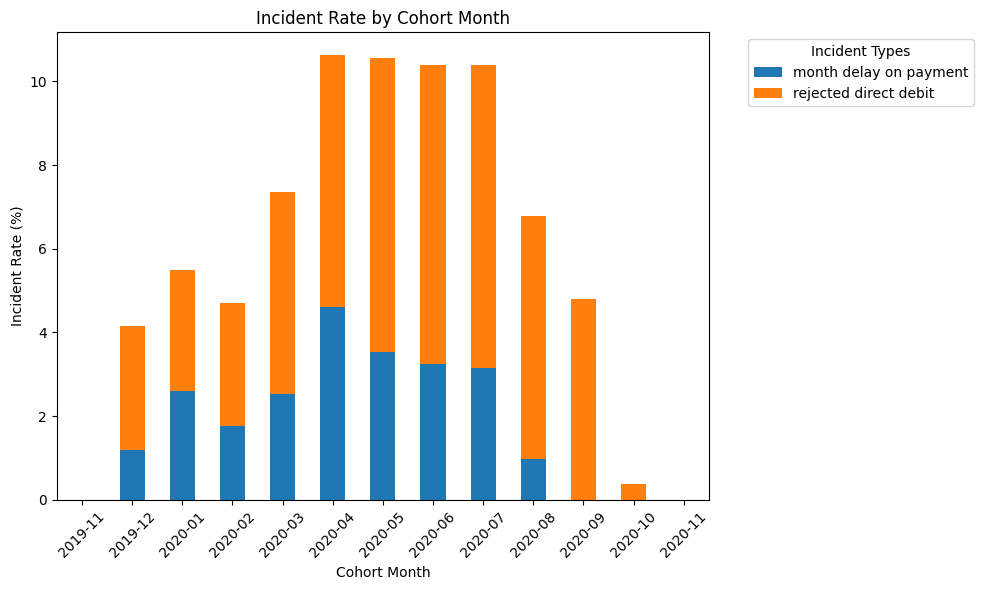

reason,month delay on payment,rejected direct debit,Total Incidents
cohort_month,,,
2019-12,12,30,42
2020-01,10,11,21
2020-02,9,15,24
2020-03,10,19,29
2020-04,49,64,113
2020-05,68,136,204
2020-06,218,479,697
2020-07,164,378,542
2020-08,21,124,145


In [26]:
# Incident Rate: The incident rate, specifically focusing on payment incidents, for each cohort
frequency = eda.incident_metric_f(cat_r, frequency_table)

# Let's have a look to the incident rate table
frequency

### Revenue Generated by the Cohort

In [27]:
#Copy of numerical data frame
num_r = num.copy()

# Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
revenue = eda.revenue_metric(num_r, "total_amount")

# Let's have a look to the revenue table
revenue

,total_amount,percentage
cohort_month,,
2019-11,0.0,0.0
2019-12,0.0,0.0
2020-01,0.0,0.0
2020-02,0.0,0.0
2020-03,0.0,0.0
2020-04,5.0,0.0
2020-05,1285.0,1.22
2020-06,8725.0,8.29
2020-07,10395.0,9.87


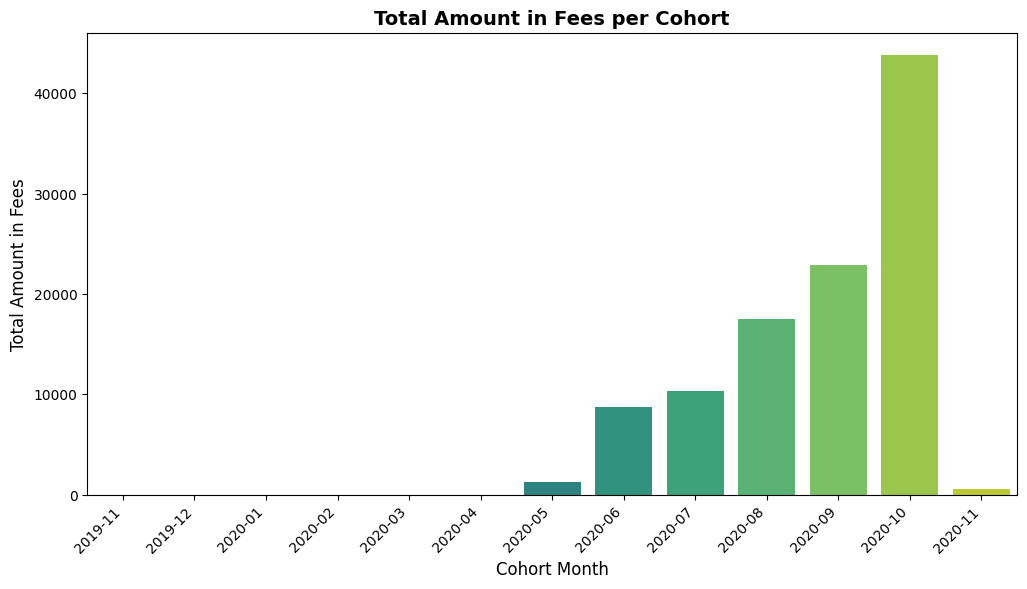

In [28]:
# Let's plot the total revenue per month
eda.revenue_plot(revenue)

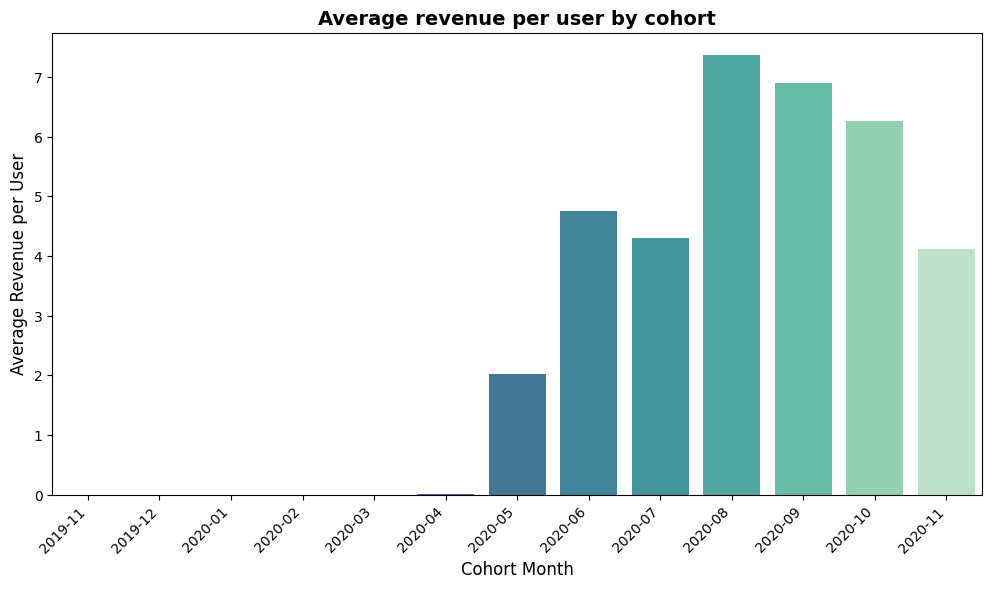

In [29]:
cohort_data = eda.revenue_plot_per_user(num_r)

## Bivariate

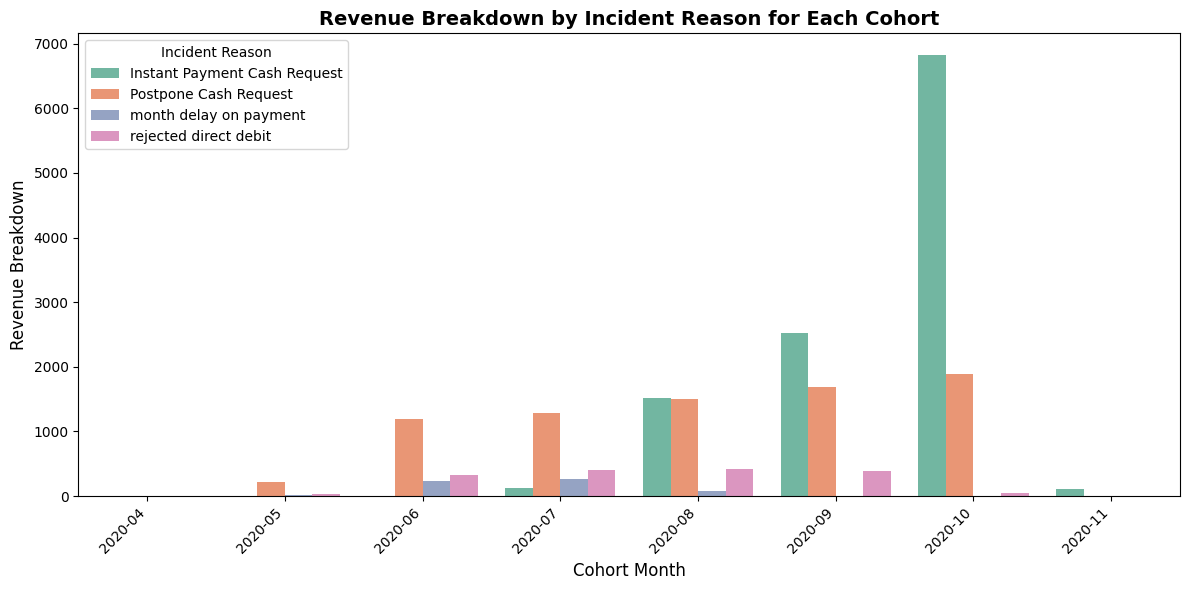

,cohort_month,total_fees,Instant Payment Cash Request,Postpone Cash Request,month delay on payment,rejected direct debit
0,2020-04,5.0,0,1,0,0
1,2020-05,1285.0,0,213,14,30
2,2020-06,8725.0,0,1185,237,323
3,2020-07,10395.0,127,1293,261,398
4,2020-08,17565.0,1515,1500,85,413
5,2020-09,22935.0,2521,1681,0,385
6,2020-10,43815.0,6819,1893,0,50
7,2020-11,565.0,113,0,0,0


In [30]:
#Let's make a copy of the data for the bivariate analysis
cat_new = cat.copy()
num_new = cohort_data.copy()

# Corelation between the diferent incidents and the revenue  
df_merged = eda.bi_rev_incid(cat_new, num_new)
df_merged

In [31]:
# Lets restructure the data
cat_new = cat.copy()
num_new = num_r.copy()
new_data_str = eda.restruct(cat_new, num_new)

In [32]:
# Data restructured 1
new_data_str[0]

total_amount                        \
reason       Instant Payment Cash Request Postpone Cash Request   
cohort_month                                                      
2020-04                          0.000000              5.000000   
2020-05                          0.000000            115.000000   
2020-06                          0.000000            150.000000   
2020-07                         35.000000            155.000000   
2020-08                        155.000000            155.000000   
2020-09                        150.000000            150.000000   
2020-10                        155.015974            155.015974   
2020-11                          5.000000              0.000000   

                                                           
reason       month delay on payment rejected direct debit  
cohort_month                                               
2020-04                         0.0                   0.0  
2020-05                        35.0                  70.0  
2020-06                       140.0                 150.0  
2020-07                       155.0                 155.0  
2020-08                       130.0                 155.0  
2020-09                         0.0                 150.0  
2020-10                         0.0                  85.0  
2020-11                         0.0                   0.0

In [33]:
# Data restructured 2
new_data_str[1]

total_amount
cohort_month reason                                    
2020-04      Instant Payment Cash Request      0.000000
             Postpone Cash Request             5.000000
             month delay on payment            0.000000
             rejected direct debit             0.000000
2020-05      Instant Payment Cash Request      0.000000
             Postpone Cash Request           115.000000
             month delay on payment           35.000000
             rejected direct debit            70.000000
2020-06      Instant Payment Cash Request      0.000000
             Postpone Cash Request           150.000000
             month delay on payment          140.000000
             rejected direct debit           150.000000
2020-07      Instant Payment Cash Request     35.000000
             Postpone Cash Request           155.000000
             month delay on payment          155.000000
             rejected direct debit           155.000000
2020-08      Instant Payment Cash Request    155.000000
             Postpone Cash Request           155.000000
             month delay on payment          130.000000
             rejected direct debit           155.000000
2020-09      Instant Payment Cash Request    150.000000
             Postpone Cash Request           150.000000
             month delay on payment            0.000000
             rejected direct debit           150.000000
2020-10      Instant Payment Cash Request    155.015974
             Postpone Cash Request           155.015974
             month delay on payment            0.000000
             rejected direct debit            85.000000
2020-11      Instant Payment Cash Request      5.000000
             Postpone Cash Request             0.000000
             month delay on payment            0.000000
             rejected direct debit             0.000000

In [34]:
# Data restructured 1
new_data_str[2]

total_amount                                  \
cohort_month                      2020-04 2020-05 2020-06 2020-07 2020-08   
reason                                                                      
Instant Payment Cash Request          0.0     0.0     0.0    35.0   155.0   
Postpone Cash Request                 5.0   115.0   150.0   155.0   155.0   
month delay on payment                0.0    35.0   140.0   155.0   130.0   
rejected direct debit                 0.0    70.0   150.0   155.0   155.0   

                                                          
cohort_month                 2020-09     2020-10 2020-11  
reason                                                    
Instant Payment Cash Request   150.0  155.015974     5.0  
Postpone Cash Request          150.0  155.015974     0.0  
month delay on payment           0.0    0.000000     0.0  
rejected direct debit          150.0   85.000000     0.0

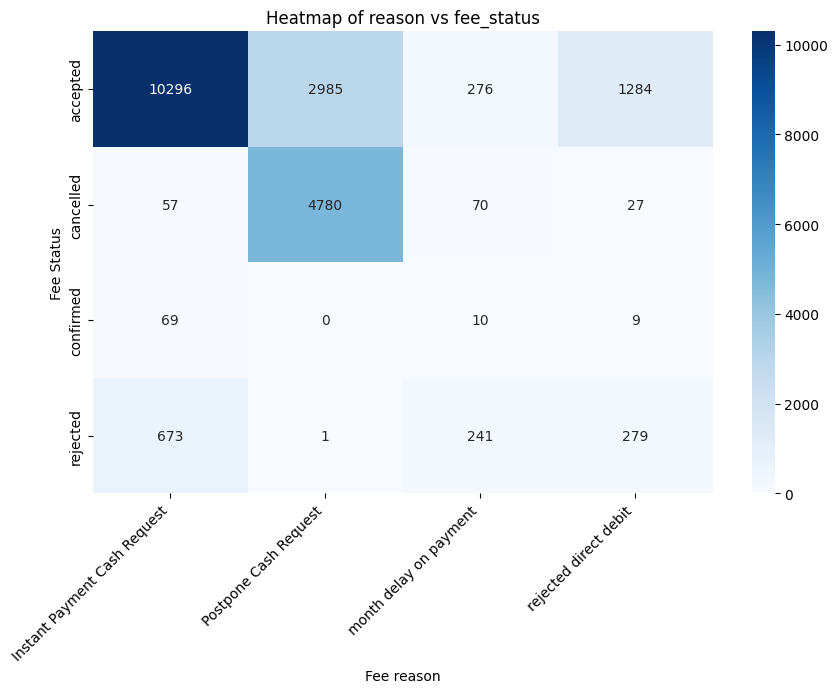

reason,Instant Payment Cash Request,Postpone Cash Request,month delay on payment,rejected direct debit
fee_status,,,,
accepted,10296,2985,276,1284
cancelled,57,4780,70,27
confirmed,69,0,10,9
rejected,673,1,241,279


In [35]:
# Study of the correlation between a fee incident and status of the fee
crosstab_table = eda.fee_heat_map(data_df, "fee_status", "reason", "Fee reason", "Fee Status")
crosstab_table

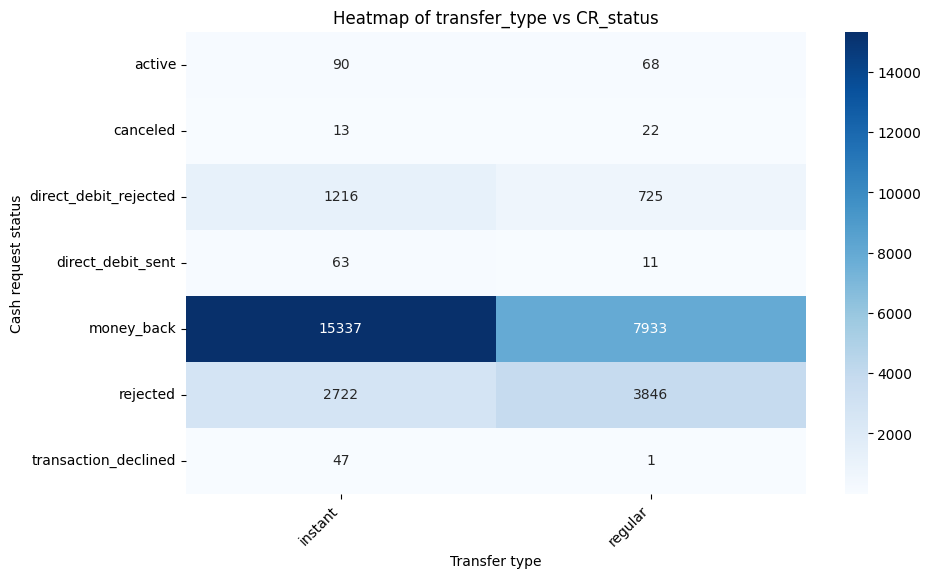

transfer_type,instant,regular
CR_status,,
active,90,68
canceled,13,22
direct_debit_rejected,1216,725
direct_debit_sent,63,11
money_back,15337,7933
rejected,2722,3846
transaction_declined,47,1


In [36]:
# Study of the correlation between a transfer type and cash request status
crosstab_table = eda.fee_heat_map(data_df, "CR_status", "transfer_type", "Transfer type", "Cash request status")
crosstab_table

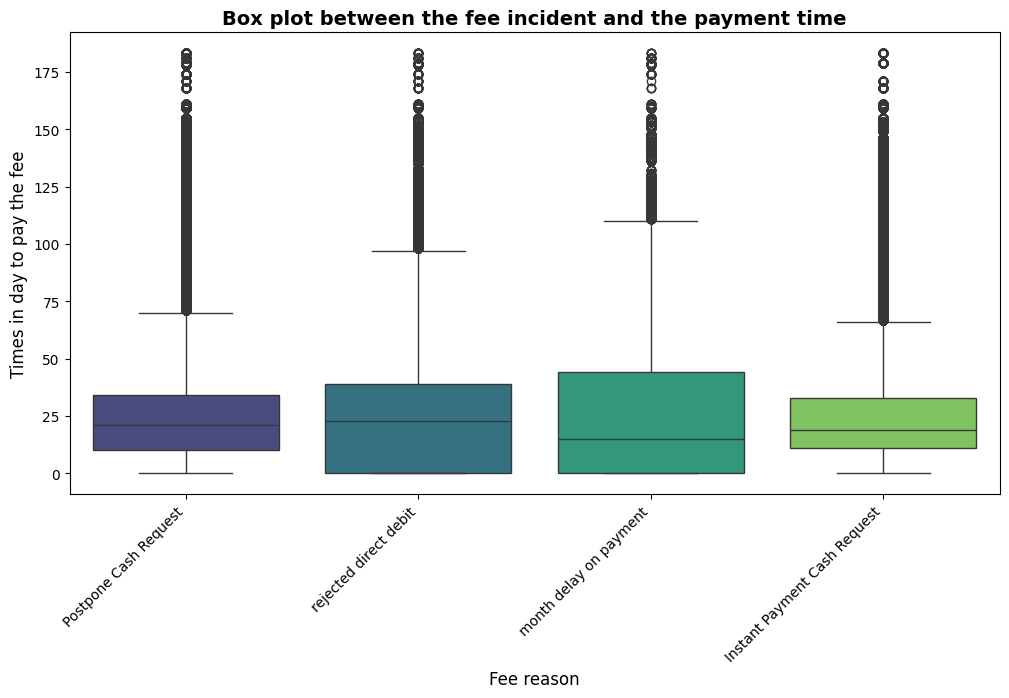

In [37]:
# Study of the correlation between a fee reason and days that take to recibe the payment
eda.cat_con(cat, num)


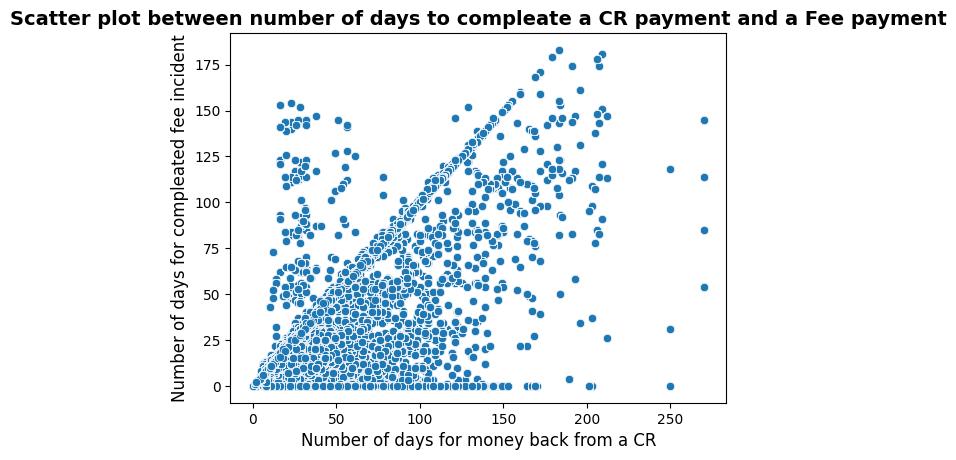

In [38]:
# Study of the correlation between the time for a CR payment and a Fee payment
eda.line_plot(cat, num)